##   **Introduction**
 The dataset consists of details (title,director,cast,duration,rating etc..) of tv shows and movies available on Netflix as of 2019.
 The aim of this notebook is to give insights and findings about the dataset through visualisations in R.

## **Importing packages**

In [9]:
library(tidyverse)# metapackage with lots of helpful functions
library(ggrepel)
library(vcd)
library(lubridate)
library(wordcloud)
library(RColorBrewer)
library(tm) 

## **Overview of the Data**

In [10]:
list.files(path = "../input")
df_netflix =read.csv(file = '../input/netflix-shows/netflix_titles.csv', na.strings = c("NA", ""), stringsAsFactors=F)
head(df_netflix)

[1] "netflix-shows"

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
2,80117401,Movie,Jandino: Whatever it Takes,NA,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
3,70234439,TV Show,Transformers Prime,NA,"Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
4,80058654,TV Show,Transformers: Robots in Disguise,NA,"Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
5,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."
6,80163890,TV Show,Apaches,NA,"Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanish-Language TV Shows",A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.


In [11]:
summary(df_netflix)

    show_id             type              title             director        
 Min.   :  247747   Length:6234        Length:6234        Length:6234       
 1st Qu.:80035802   Class :character   Class :character   Class :character  
 Median :80163367   Mode  :character   Mode  :character   Mode  :character  
 Mean   :76703679                                                           
 3rd Qu.:80244889                                                           
 Max.   :81235729                                                           
     cast             country           date_added         release_year 
 Length:6234        Length:6234        Length:6234        Min.   :1925  
 Class :character   Class :character   Class :character   1st Qu.:2013  
 Mode  :character   Mode  :character   Mode  :character   Median :2016  
                                                          Mean   :2013  
                                                          3rd Qu.:2018  
                       

In [12]:
glimpse(df_netflix)

Rows: 6,234
Columns: 12
$ show_id      <int> 81145628, 80117401, 70234439, 80058654, 80125979, 801638…
$ type         <chr> "Movie", "Movie", "TV Show", "TV Show", "Movie", "TV Sho…
$ title        <chr> "Norm of the North: King Sized Adventure", "Jandino: Wha…
$ director     <chr> "Richard Finn, Tim Maltby", NA, NA, NA, "Fernando Lebrij…
$ cast         <chr> "Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, …
$ country      <chr> "United States, India, South Korea, China", "United King…
$ date_added   <chr> "September 9, 2019", "September 9, 2016", "September 8, …
$ release_year <int> 2019, 2016, 2013, 2016, 2017, 2016, 2014, 2017, 2017, 20…
$ rating       <chr> "TV-PG", "TV-MA", "TV-Y7-FV", "TV-Y7", "TV-14", "TV-MA",…
$ duration     <chr> "90 min", "94 min", "1 Season", "1 Season", "99 min", "1…
$ listed_in    <chr> "Children & Family Movies, Comedies", "Stand-Up Comedy",…
$ description  <chr> "Before planning an awesome wedding for his grandfather,…


In [13]:
df_netflix$date_added <- as.Date(df_netflix$date_added, format = "%B %d, %Y")

### **Content produced in each type**

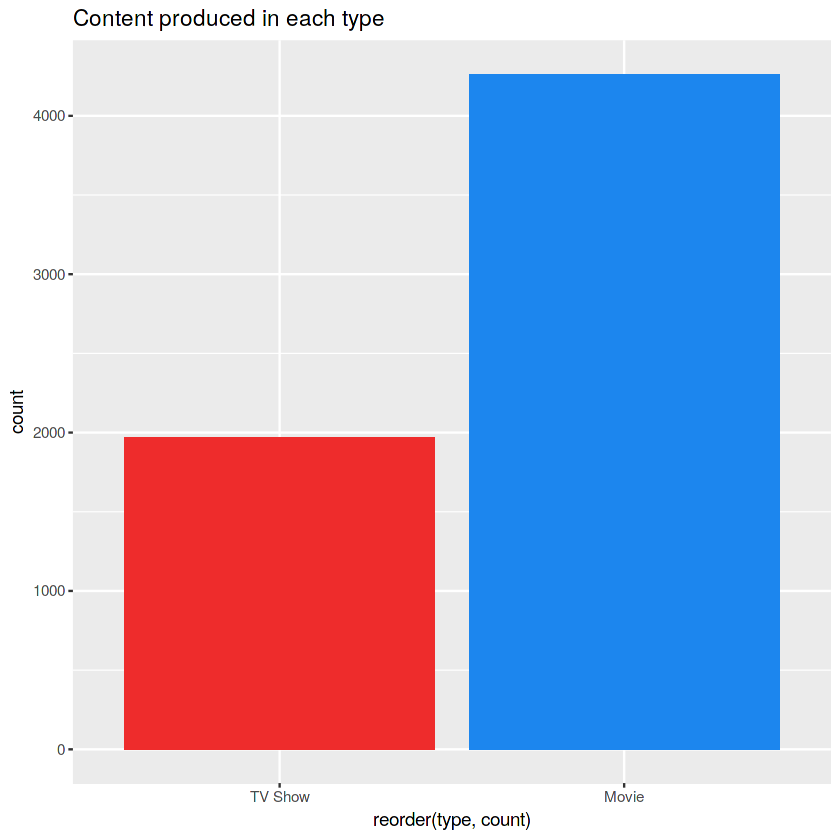

In [39]:
df_netflix%>% group_by(type) %>% mutate(count = n()) %>% 
ggplot(aes(x =reorder(type,count))) +
geom_bar(fill = c("dodgerblue2","firebrick2")) +
    labs(
        title = 'Content produced in each type'
    )

### **Distribution of Movie duration**

In [16]:
unique(df_netflix$duration)

[1] "90 min"     "94 min"     "1 Season"   "99 min"     "110 min"   
  [6] "60 min"     "78 min"     "95 min"     "58 min"     "62 min"    
 [11] "65 min"     "61 min"     "135 min"    "98 min"     "96 min"    
 [16] "79 min"     "113 min"    "80 min"     "77 min"     "112 min"   
 [21] "106 min"    "102 min"    "114 min"    "125 min"    "142 min"   
 [26] "133 min"    "100 min"    "86 min"     "146 min"    "10 min"    
 [31] "122 min"    "126 min"    "116 min"    "130 min"    "70 min"    
 [36] "128 min"    "88 min"     "108 min"    "93 min"     "64 min"    
 [41] "107 min"    "92 min"     "111 min"    "103 min"    "40 min"    
 [46] "85 min"     "72 min"     "45 min"     "89 min"     "24 min"    
 [51] "127 min"    "163 min"    "117 min"    "42 min"     "104 min"   
 [56] "75 min"     "82 min"     "38 min"     "97 min"     "81 min"    
 [61] "91 min"     "152 min"    "87 min"     "121 min"    "101 min"   
 [66] "119 min"    "83 min"     "182 min"    "124 min"    "63 min"    
 [71] "139 min"    "171 min"    "84 min"     "69 min"     "76 min"    
 [76] "41 min"     "153 min"    "141 min"    "52 min"     "137 min"   
 [81] "132 min"    "157 min"    "109 min"    "105 min"    "25 min"    
 [86] "71 min"     "123 min"    "67 min"     "140 min"    "138 min"   
 [91] "149 min"    "47 min"     "68 min"     "148 min"    "54 min"    
 [96] "151 min"    "155 min"    "162 min"    "28 min"     "160 min"   
[101] "29 min"     "57 min"     "46 min"     "73 min"     "74 min"    
[106] "118 min"    "66 min"     "14 min"     "20 min"     "115 min"   
[111] "48 min"     "168 min"    "144 min"    "161 min"    "55 min"    
[116] "56 min"     "51 min"     "50 min"     "23 min"     "205 min"   
[121] "190 min"    "131 min"    "22 min"     "59 min"     "150 min"   
[126] "159 min"    "145 min"    "158 min"    "143 min"    "154 min"   
[131] "147 min"    "129 min"    "214 min"    "136 min"    "134 min"   
[136] "44 min"     "156 min"    "30 min"     "120 min"    "209 min"   
[141] "166 min"    "200 min"    "185 min"    "36 min"     "11 min"    
[146] "53 min"     "165 min"    "164 min"    "19 min"     "177 min"   
[151] "32 min"     "18 min"     "170 min"    "187 min"    "173 min"   
[156] "12 min"     "3 min"      "176 min"    "15 min"     "49 min"    
[161] "26 min"     "37 min"     "189 min"    "201 min"    "179 min"   
[166] "191 min"    "193 min"    "192 min"    "43 min"     "172 min"   
[171] "224 min"    "27 min"     "181 min"    "178 min"    "228 min"   
[176] "34 min"     "312 min"    "174 min"    "169 min"    "35 min"    
[181] "31 min"     "180 min"    "196 min"    "167 min"    "33 min"    
[186] "203 min"    "195 min"    "2 Seasons"  "5 Seasons"  "3 Seasons" 
[191] "7 Seasons"  "4 Seasons"  "8 Seasons"  "6 Seasons"  "9 Seasons" 
[196] "14 Seasons" "10 Seasons" "12 Seasons" "15 Seasons" "11 Seasons"
[201] "13 Seasons"

**We are forced to only consider the duration of the movies and not the TV Shows, as the duration for each season is not available.**

In [17]:
to_remove <- c('1 Season','2 Seasons','5 Seasons','3 Seasons','7 Seasons','4 Seasons','8 Seasons','6 Seasons','9 Seasons','14 Seasons','10 Seasons','12 Seasons','15 Seasons','11 Seasons','13 Seasons')
df_netflix_d <- df_netflix[!(df_netflix$duration %in% to_remove), ] 
df_netflix_d$duration <- str_remove_all(df_netflix_d$duration, " min")
df_netflix_d <- transform(df_netflix_d, duration = as.numeric(duration))

Warning message:
“Removed 8 rows containing non-finite values (stat_density).”


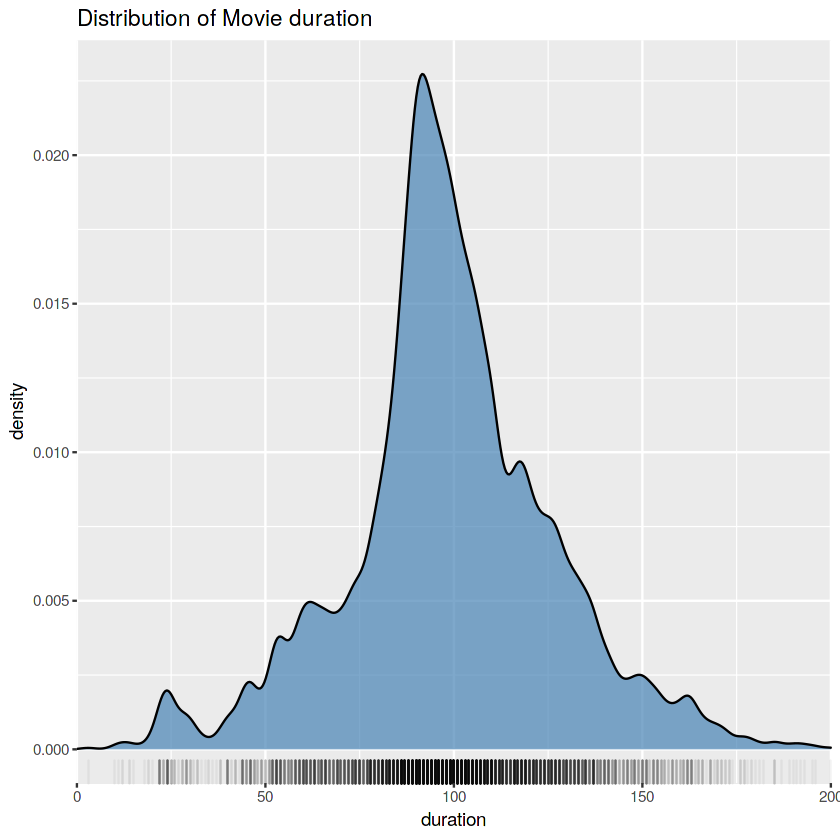

In [18]:
ggplot(df_netflix_d,aes(x = duration)) +
    geom_density(  
        fill = 'steelblue',
        bw = 2.0,
        alpha = 0.7 ) +
scale_x_continuous(limits = c(0,200),expand = c(0,0)) +
    geom_rug(alpha = 0.05)  +
    labs(
        title = 'Distribution of Movie duration'
    )

** From the above plot it can be inferred that most of the movies have duration between 85 to 110 minutes.**

Selecting by count



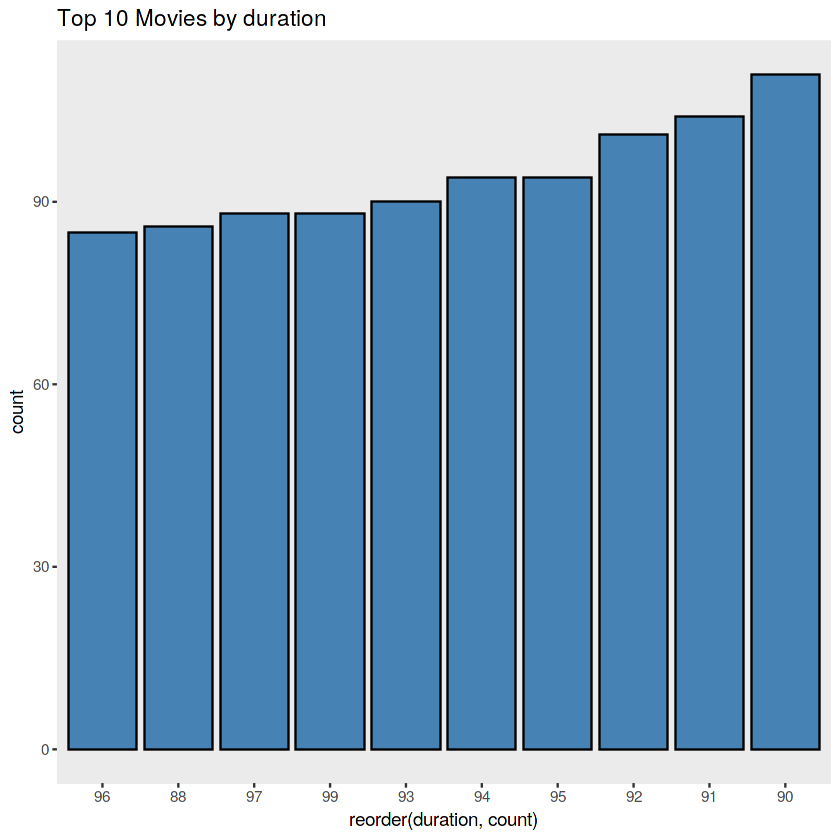

In [19]:
df_netflix_d%>%
select(duration)%>%
group_by(duration)%>%
summarise(count = n()) %>%
arrange(desc(count))%>%
top_n(10) %>%
 ggplot(aes(reorder(duration,count),count))+
 geom_col(fill = 'steelblue',color = 'black') +
theme(
    panel.grid = element_blank()
) +
    labs(
        title = 'Top 10 Movies by duration'
    )


In [20]:
na_count <-sapply(df_netflix, function(y) sum(is.na(y)))
na_count <- data.frame(na_count)     
na_count                  

,na_count
,<int>
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,651
release_year,0
rating,10


Columns - director,cast,date_added,country and rating have missing values.To start with i will just impute the column ratings with the mode value.The other missing columns will be dealt with seperately.

In [21]:
getmode <- function(values) {
   unique_values <- unique(values)
   unique_values[which.max(tabulate(match(values, unique_values)))]
}
df_netflix$rating[is.na(df_netflix$rating)] <- getmode(df_netflix$rating)

In [22]:
df_netflix=distinct(df_netflix,title,country,type,release_year, .keep_all= TRUE)
colnames(df_netflix)[colSums(is.na(df_netflix)) > 0]

[1] "director"   "cast"       "country"    "date_added"

In [23]:
df_netflix1 <- df_netflix[!is.na(df_netflix$date_added), ]

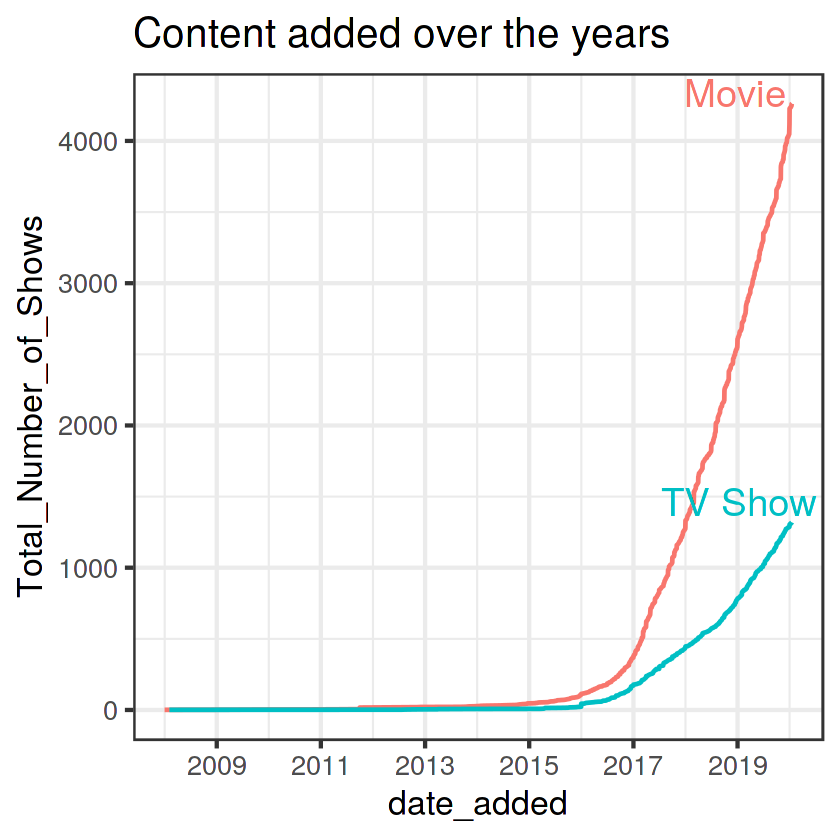

In [24]:
df_by_date <- df_netflix1 %>% 
group_by(date_added,type) %>% 
summarise(addedToday = n()) %>% 
ungroup() %>%
group_by(type) %>% 
mutate(Total_Number_of_Shows = cumsum(addedToday), label = if_else(date_added == max(date_added,na.rm = T), as.character(type), NA_character_))


df_by_date  %>% 
                ggplot(aes(x = date_added, y = Total_Number_of_Shows, color = type)) + 
                    geom_line(size = 1) + 
                    theme_bw(base_size = 20) + 
                    scale_x_date(date_breaks = '2 years', date_labels = "%Y") + 
                    theme(legend.position = 'none') +
                    geom_text_repel(aes(label = label), size = 8,na.rm = TRUE, nudge_y = 100) +
    labs(
        title = 'Content added over the years'
    )


The content added over the years from 2016 have increased exponentially,

### Monthly produce of content

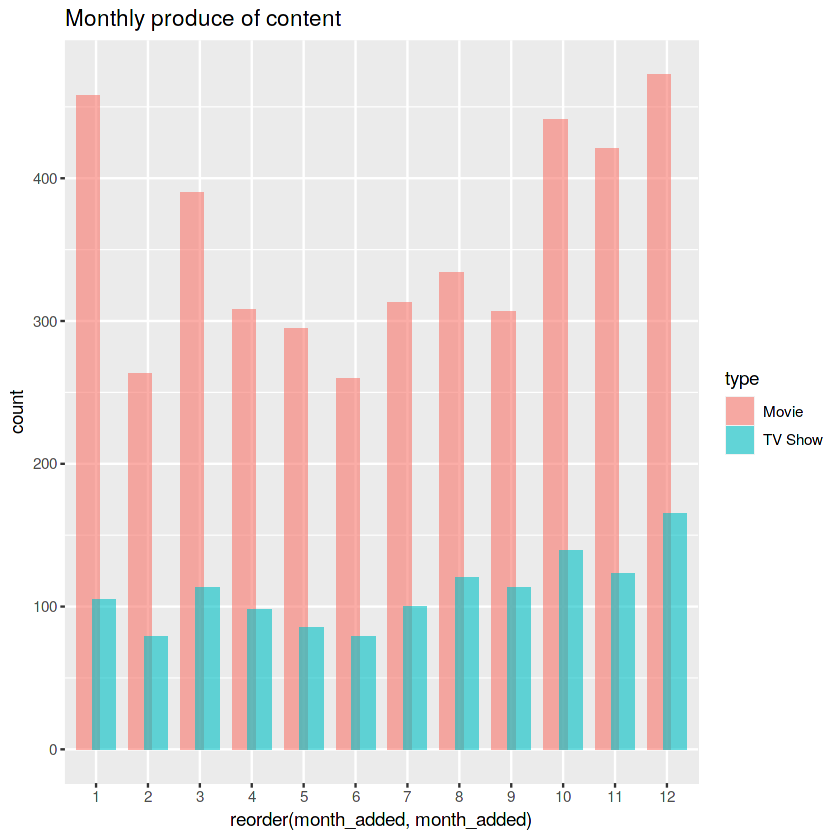

In [25]:
posn_d <- position_dodge(width = 0.6)
df_netflix2 <- df_netflix[!is.na(df_netflix$date_added), ]

df_netflix2%>%
mutate(month_added = month(as.POSIXlt(df_netflix2$date_added, format="%B %d, %Y")))%>%

  mutate(count = n()) %>%
 ggplot(aes(reorder(month_added,month_added),fill = type))+
 geom_bar(position = posn_d,alpha = 0.6) +
    labs(
        title = 'Monthly produce of content'
    )


From the above plot it can be inferred that october,november,december and january are the months in which highest number of content is produced.

### Types of Rating

In [26]:
unique(df_netflix$rating)

[1] "TV-PG"    "TV-MA"    "TV-Y7-FV" "TV-Y7"    "TV-14"    "R"       
 [7] "TV-Y"     "NR"       "PG-13"    "TV-G"     "PG"       "G"       
[13] "UR"       "NC-17"

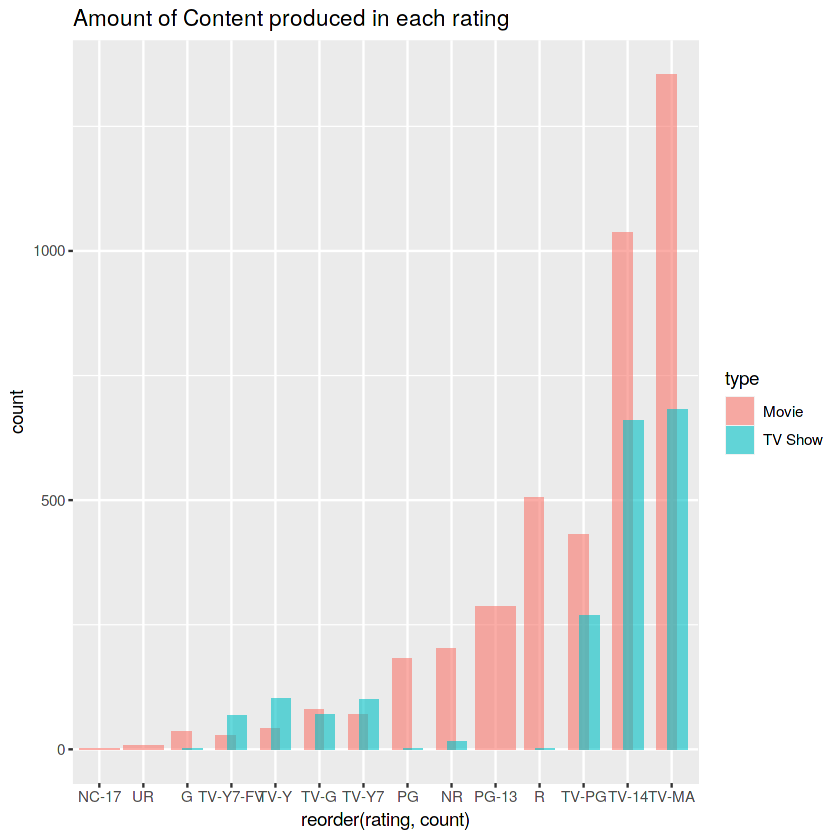

In [35]:
# # df_by_rating_full <- 
posn_d <- position_dodge(width = 0.5)
df_netflix%>% group_by(rating) %>% mutate(count = n()) %>% 
ggplot(aes(x =reorder(rating,count),fill = type)) +
geom_bar(position = posn_d,alpha = 0.6) +
    labs(
        title = 'Amount of Content produced in each rating'
    )


### Top movie/TV Show categories 

Selecting by count



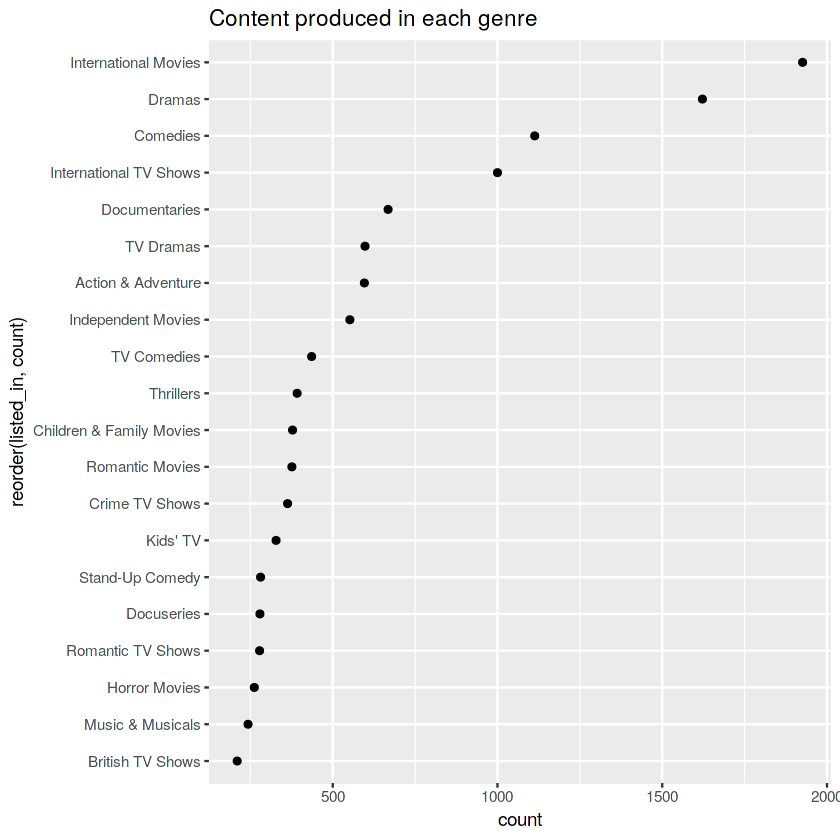

In [28]:
df_netflix %>% 
  mutate(listed_in = strsplit(as.character(listed_in), ", ")) %>%
  unnest(listed_in)%>% group_by(listed_in) %>% summarise(count = n()) %>%
   arrange(desc(count)) %>% top_n(20)%>%
   ggplot( aes(x = count, y = reorder(listed_in,count)))+
	geom_point() +
    labs(
        title = 'Content produced in each genre'
    )


From the above point plot it can be inferred that most of the content produced belongs to International,Dramas and Comedies.The same information can also be represented using a bar chart.

### Country-wise content produced

Selecting by count



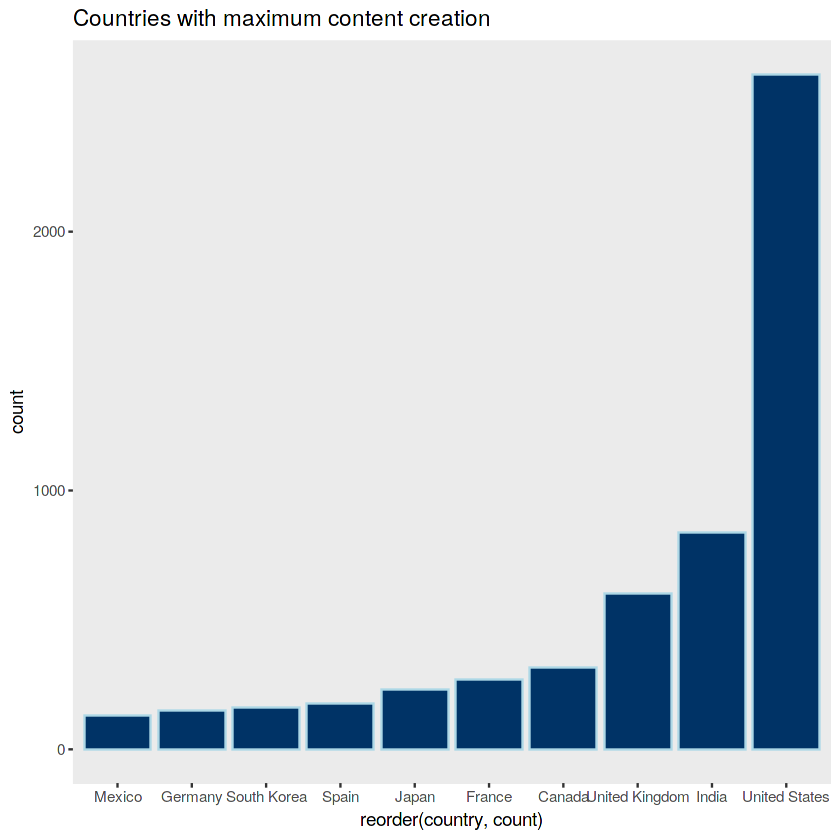

In [29]:
df_netflix1 <- df_netflix[!is.na(df_netflix$country), ]
 
df_netflix1 %>% 
  mutate(country = strsplit(as.character(country), ", ")) %>%
  unnest(country)%>%
  group_by(country) %>%
  summarise(count = n()) %>%
   arrange(desc(count))%>%
  top_n(10)%>%
   ggplot(aes(reorder(country,count),count))+
 geom_col(fill = '#003366', color = '#add8e6')+
theme(
    panel.grid = element_blank(),
) +
    labs(
        title = 'Countries with maximum content creation'
    )


United States produce the most number of movies.

### Actors with most movies 

In [30]:
df_netflix3 <- df_netflix[!is.na(df_netflix$cast), ]


Selecting by count



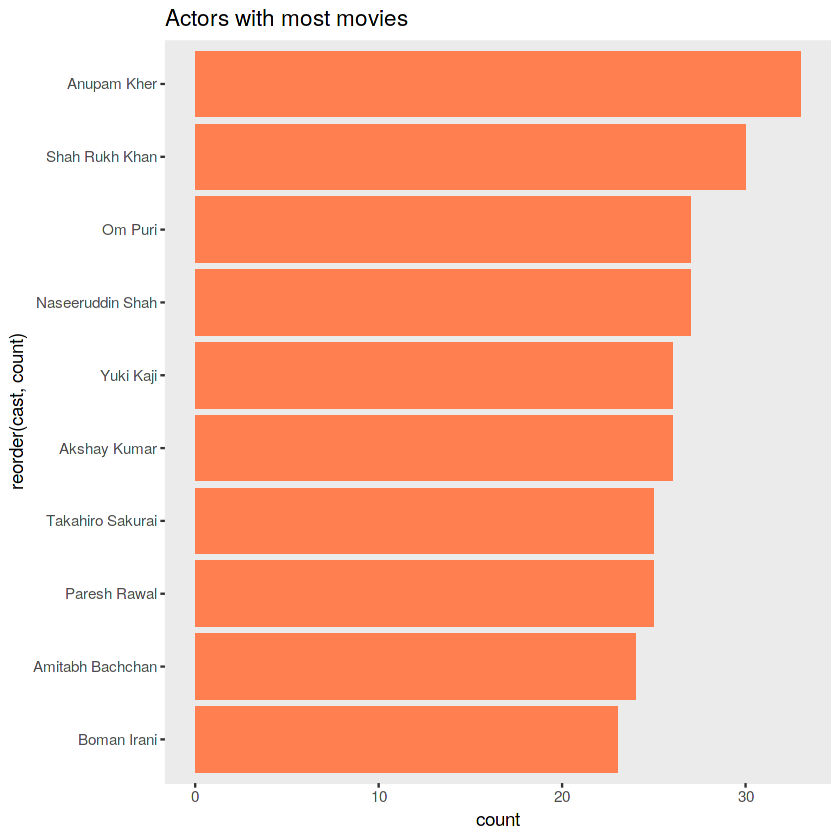

In [38]:
df_netflix3 %>% 
  mutate(cast = strsplit(as.character(cast), ", "))%>%
  unnest(cast)%>%
  group_by(cast) %>%
  summarise(count = n()) %>%
 arrange(desc(count)) %>%
 top_n(10)%>%
   ggplot(aes(reorder(cast,count),count))+
 geom_col(fill = "coral")+
theme(
    panel.grid = element_blank()
) +
coord_flip()   +
    labs(
        title = 'Actors with most movies'
    )

### Directors with most movies

Selecting by count



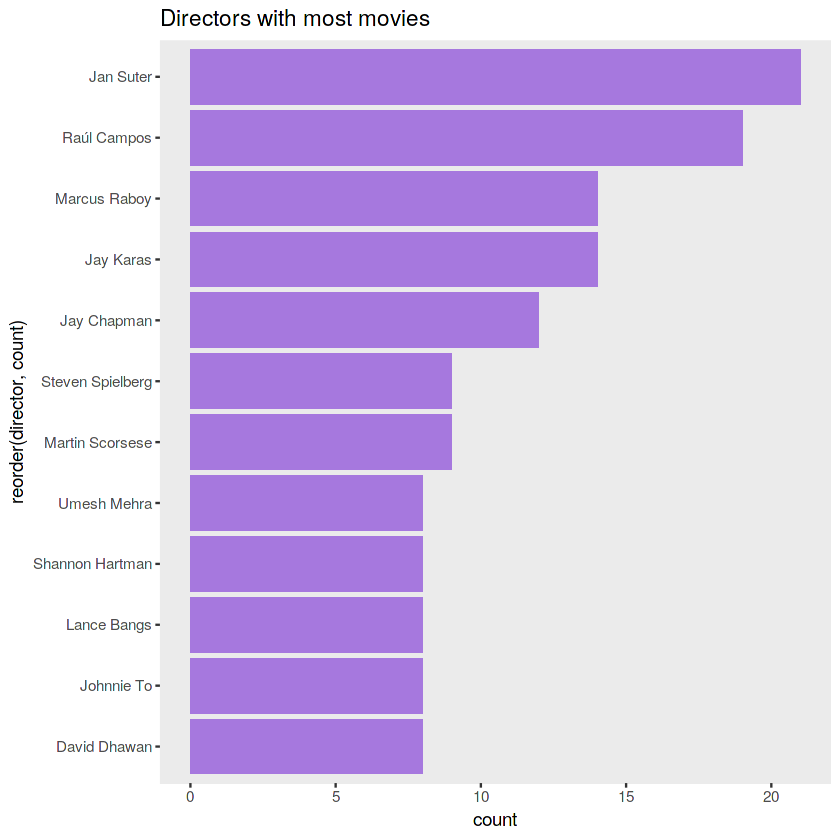

In [37]:
df_netflix4 <- df_netflix[!is.na(df_netflix$director), ]
df_netflix4 %>% 
  mutate(director = strsplit(as.character(director), ", ")) %>%
  unnest(director)%>%
  group_by(director) %>%
  summarise(count = n()) %>%
 arrange(desc(count)) %>%
 top_n(10)%>%
 ggplot(aes(reorder(director,count),count))+
 geom_col(fill = '#a678de')+
theme(
    panel.grid = element_blank(),
) +
coord_flip() +
    labs(
        title = 'Directors with most movies'
    )

### Most popular words as Movie/TV Show titles

Warning message in tm_map.SimpleCorpus(corp_title, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp_title, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in wordcloud(d$word, d$freq, scale = c(8, 0.3), min.freq = 2, max.words = 100, :
“love could not be fit on page. It will not be plotted.”


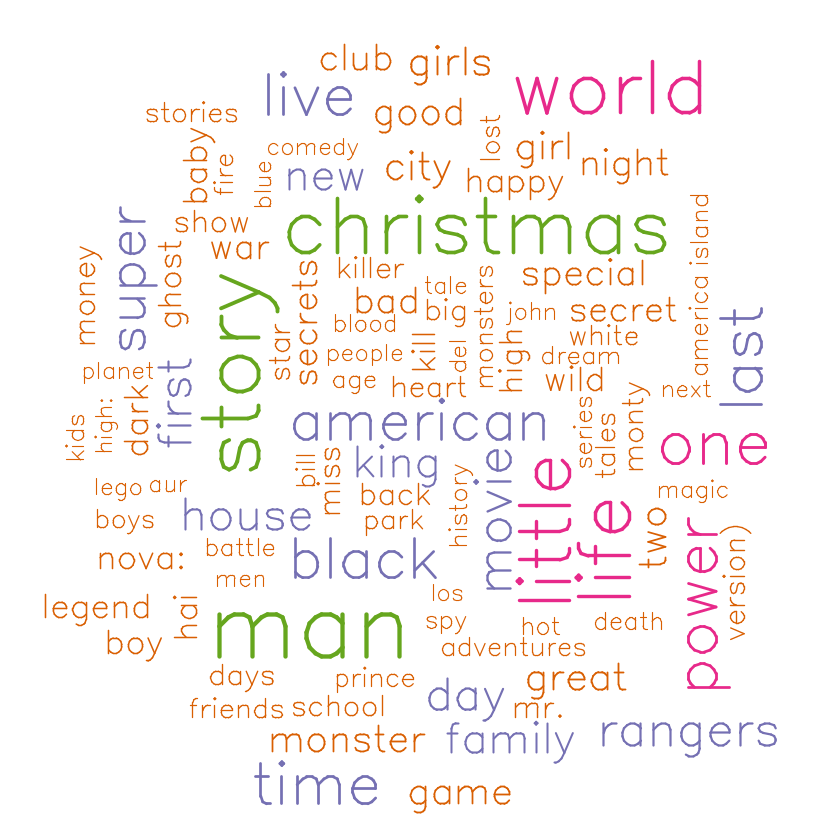

In [33]:
pal2 <- brewer.pal(8,"Dark2")
df_netflix5 <- df_netflix %>% 
  mutate(title = strsplit(as.character(title), " ")) %>%
  unnest(title) %>%
group_by(title)

corp_title <- Corpus(VectorSource(df_netflix5$title))
corp_title <- tm_map(corp_title, tolower)
title_cleaned <- tm_map(corp_title,removeWords, stopwords("english"))


tdm <- TermDocumentMatrix(title_cleaned)
m <- as.matrix(tdm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
 wordcloud(d$word,d$freq, scale=c(8,.3),min.freq=2,max.words=100, random.order=T, rot.per=.35, colors=pal2, vfont=c("sans serif","plain")) 
